<a href="https://colab.research.google.com/github/affaresha/TugasPython/blob/main/Klasifikasi_Daun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/dataset

/content/drive/.shortcut-targets-by-id/469/dataset


In [ ]:
ls

In [ ]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [ ]:
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [ ]:
for imagePath in imagePaths:

	image = Image.open(imagePath)
	image = np.array(image.resize((240, 240))) / 255.0 #normalisasi
	data.append(image)

	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [ ]:
print(labels)

['GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07',

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [ ]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.10, shuffle=True)
print(trainX.shape)
print(testX.shape)

(533, 240, 240, 3)
(60, 240, 240, 3)


In [ ]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model = Sequential()
model.add(Convolution2D(8, (3,3), activation='relu', input_shape=(240,240,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
#fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 238, 238, 8)       224       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 119, 119, 8)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 117, 117, 16)      1168      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 58, 58, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 26, 26, 64)       

In [ ]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
17/17 [==============================] - 17s 997ms/step - loss: 1.5914 - accuracy: 0.2214 - val_loss: 1.5322 - val_accuracy: 0.3000
Epoch 2/25
17/17 [==============================] - 17s 981ms/step - loss: 1.4890 - accuracy: 0.3358 - val_loss: 1.3865 - val_accuracy: 0.3833
Epoch 3/25
17/17 [==============================] - 17s 981ms/step - loss: 1.3589 - accuracy: 0.4203 - val_loss: 1.2647 - val_accuracy: 0.4500
Epoch 4/25
17/17 [==============================] - 17s 986ms/step - loss: 1.1235 - accuracy: 0.5366 - val_loss: 0.9643 - val_accuracy: 0.5500
Epoch 5/25
17/17 [==============================] - 17s 978ms/step - loss: 0.9619 - accuracy: 0.6248 - val_loss: 0.8509 - val_accuracy: 0.6667
Epoch 6/25
17/17 [==============================] - 17s 976ms/step - loss: 0.8482 - accuracy: 0.7092 - val_loss: 0.8848 - val_accuracy: 0.6833
Epoch 7/25
17/17 [==============================] - 17s 981ms/step - loss: 0.6944 - accuracy: 0.7373 - val_loss: 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


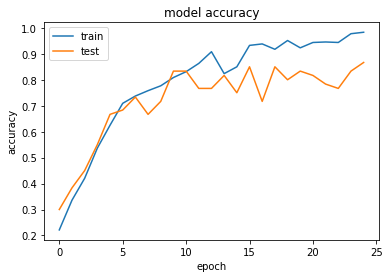

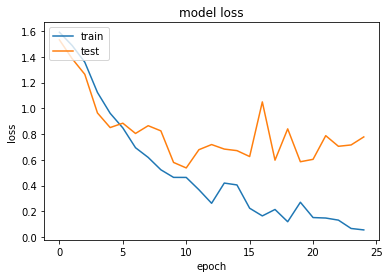

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_02       0.86      0.92      0.89        13
      GMB_05       0.80      0.89      0.84         9
      GMB_06       0.77      0.83      0.80        12
      GMB_07       1.00      0.85      0.92        13
      GMB_08       0.92      0.85      0.88        13

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In [ ]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets
